In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ins=pd.read_csv("Insurance_Marketing-Customer-Value-Analysis (1).csv")

In [3]:
ins.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


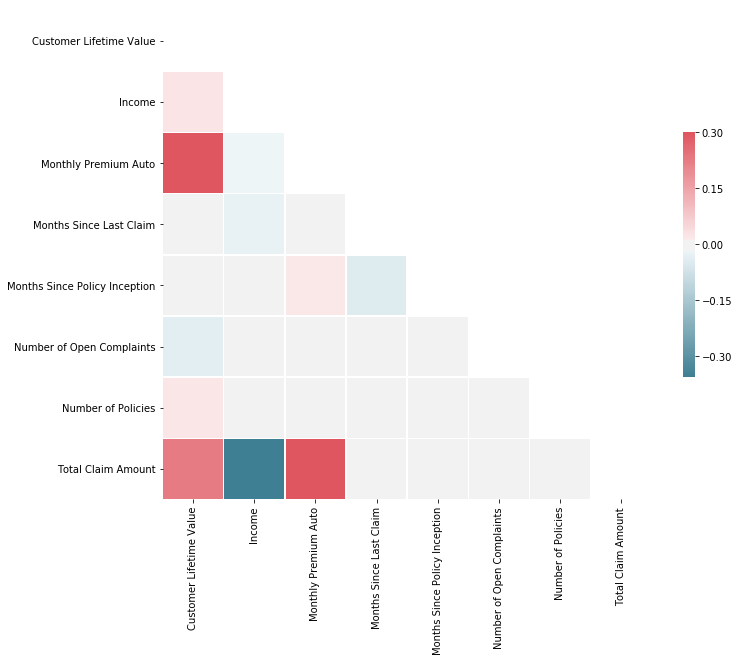

In [4]:
corr = ins.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

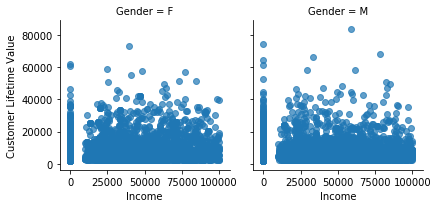

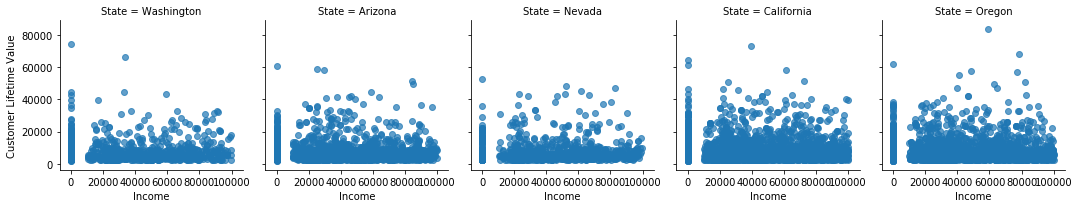

In [27]:
g = sns.FacetGrid(ins, col="Gender")
g.map(plt.scatter, "Income", "Customer Lifetime Value", alpha=.7)
g.add_legend();
plt.savefig('foo.png', bbox_inches='tight')

g = sns.FacetGrid(ins, col="State")
g.map(plt.scatter, "Income", "Customer Lifetime Value", alpha=.7)
g.add_legend();
plt.savefig('State.png', bbox_inches='tight')

In [23]:
df = ins.groupby("State").agg(['mean', 'std'])

df.to_csv("States.txt",sep="\t")
df
#ins.groupby("State").std()
#ins.groupby("State").agg('median')

Customer Lifetime Value                     Income                \
                              mean          std          mean           std   
State                                                                         
Arizona                7861.341489  6703.351809  37405.402231  30131.906850   
California             8003.647758  6725.913601  37558.946667  30510.334698   
Nevada                 8056.706839  7092.003745  38369.605442  30365.994106   
Oregon                 8077.901191  6909.064787  37557.283353  30359.353995   
Washington             8021.472273  7410.109226  38122.733083  30532.934046   

           Monthly Premium Auto            Months Since Last Claim             \
                           mean        std                    mean        std   
State                                                                           
Arizona               91.884909  32.905693               15.097475  10.215418   
California            93.495238  33.847028               15.082540  10.061016   
Nevada                94.278912  34.125883               15.333333  10.107257   
Oregon                93.763937  35.632553               14.891196  10.010691   
Washington            92.031328  35.929253               15.562657   9.985835   

           Months Since Policy Inception            Number of Open Complaints  \
                                    mean        std                      mean   
State                                                                           
Arizona                        47.781562  28.084257                  0.383441   
California                     47.648889  27.539213                  0.382540   
Nevada                         48.530612  28.587633                  0.428571   
Oregon                         48.237985  27.958387                  0.363706   
Washington                     49.229323  28.053879                  0.412281   

                     Number of Policies           Total Claim Amount  \
                 std               mean       std               mean   
State                                                                  
Arizona     0.907150           3.067528  2.455627         425.361446   
California  0.895995           2.967619  2.366049         437.819268   
Nevada      0.983404           2.776644  2.308008         438.750566   
Oregon      0.897847           2.973856  2.384261         433.012542   
Washington  0.930023           2.928571  2.444087         436.343596   

                        
                   std  
State                   
Arizona     276.496662  
California  294.159177  
Nevada      306.724634  
Oregon      289.362662  
Washington  290.700831

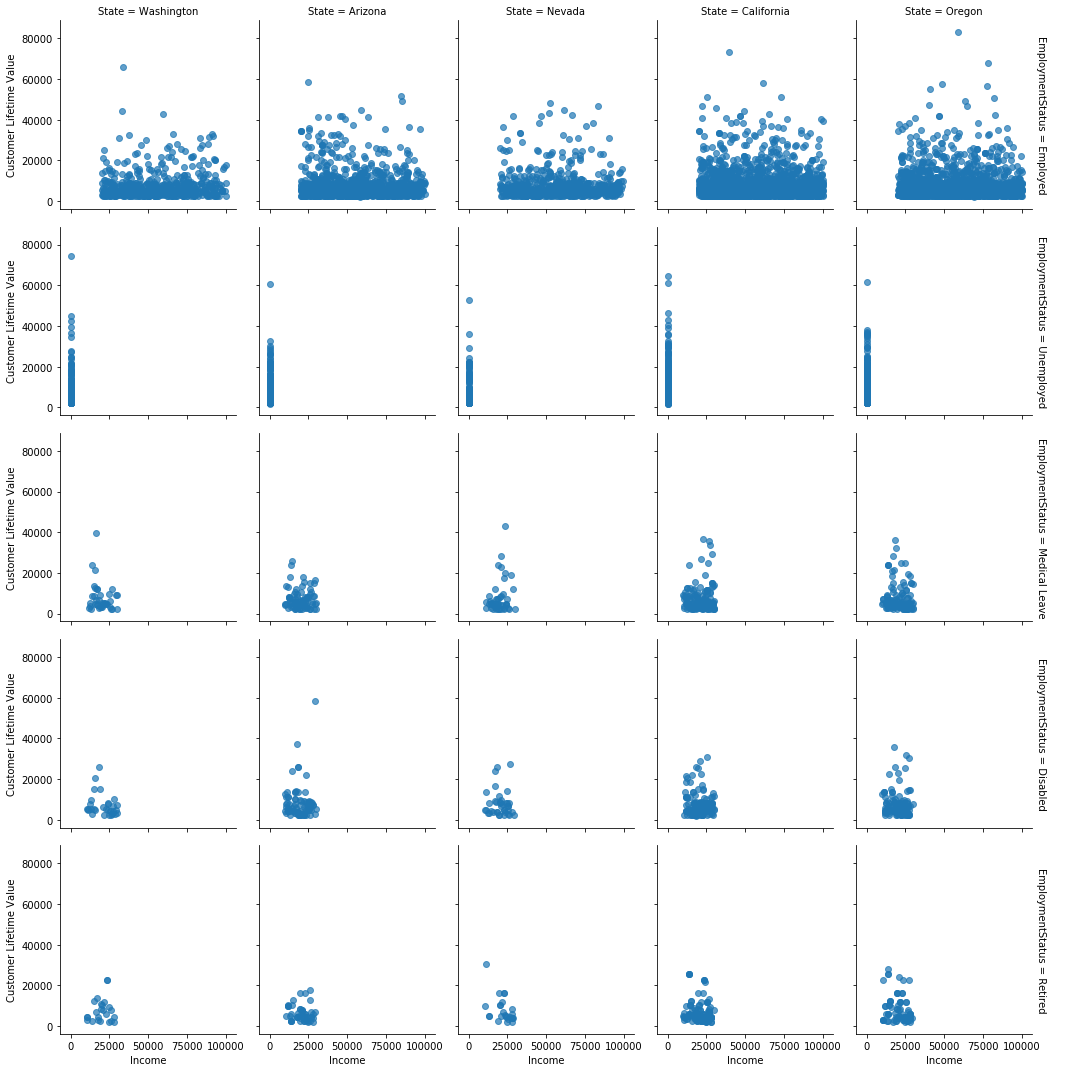

In [7]:
# INCOME variation with CLV for different states and Employment statuses
g = sns.FacetGrid(ins, col="State", row = "EmploymentStatus", margin_titles=True)
g.map(plt.scatter, "Income", "Customer Lifetime Value", alpha=.7)
g.add_legend();

In [8]:
list(ins)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [40]:
dfsa = ins.groupby("Policy Type").mean()
dfsa

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Policy Type,,,,,,,,
Corporate Auto,7814.409552,37782.615854,93.238313,15.422256,47.958333,0.358232,2.984248,430.312188
Personal Auto,8027.363535,37544.292722,93.230849,15.020035,48.199175,0.391131,2.965822,434.828219
Special Auto,8594.245038,39036.142857,92.912698,14.785714,46.201058,0.399471,2.878307,440.472770


In [34]:
plt.plot(dfsa["Policy Type"], dfsa["Customer Lifetime Value"], '-o')

KeyError: 'Policy Type'

In [28]:
dfsa = ins.groupby("Vehicle Class").agg(['mean', 'count'])

In [ ]:
plt.plot(dates, values, '-o')


In [16]:
ins.groupby("Vehicle Size").agg(['mean', 'count'])

Customer Lifetime Value              Income        \
                                mean count          mean count   
Vehicle Size                                                     
Large                    7544.995730   946  35969.707188   946   
Medsize                  8050.661755  6424  37970.044209  6424   
Small                    8085.095932  1764  37423.810658  1764   

             Monthly Premium Auto       Months Since Last Claim        \
                             mean count                    mean count   
Vehicle Size                                                            
Large                   91.464059   946               14.881607   946   
Medsize                 93.532067  6424               15.197073  6424   
Small                   93.021542  1764               14.848073  1764   

             Months Since Policy Inception       Number of Open Complaints  \
                                      mean count                      mean   
Vehicle Size                                                                 
Large                            48.101480   946                  0.402748   
Medsize                          47.948786  6424                  0.382783   
Small                            48.466553  1764                  0.380385   

                   Number of Policies       Total Claim Amount        
             count               mean count               mean count  
Vehicle Size                                                          
Large          946           2.821353   946         426.063559   946  
Medsize       6424           2.975560  6424         420.075376  6424  
Small         1764           3.009637  1764         489.425571  1764

In [11]:
ins.groupby("Coverage").agg(['mean', 'count'])

Customer Lifetime Value              Income        \
                            mean count          mean count   
Coverage                                                     
Basic                7190.706422  5568  38145.834770  5568   
Extended             8789.677608  2742  36380.099927  2742   
Premium             10895.603083   824  38607.120146   824   

         Monthly Premium Auto       Months Since Last Claim        \
                         mean count                    mean count   
Coverage                                                            
Basic               82.173851  5568               14.974677  5568   
Extended           103.579504  2742               15.221371  2742   
Premium            133.381068   824               15.509709   824   

         Months Since Policy Inception       Number of Open Complaints        \
                                  mean count                      mean count   
Coverage                                                                       
Basic                        47.924928  5568                  0.384698  5568   
Extended                     47.982130  2742                  0.398979  2742   
Premium                      49.282767   824                  0.333738   824   

         Number of Policies       Total Claim Amount        
                       mean count               mean count  
Coverage                                                    
Basic              2.986530  5568         379.036312  5568  
Extended           2.954048  2742         480.578885  2742  
Premium            2.868932   824         651.390241   824

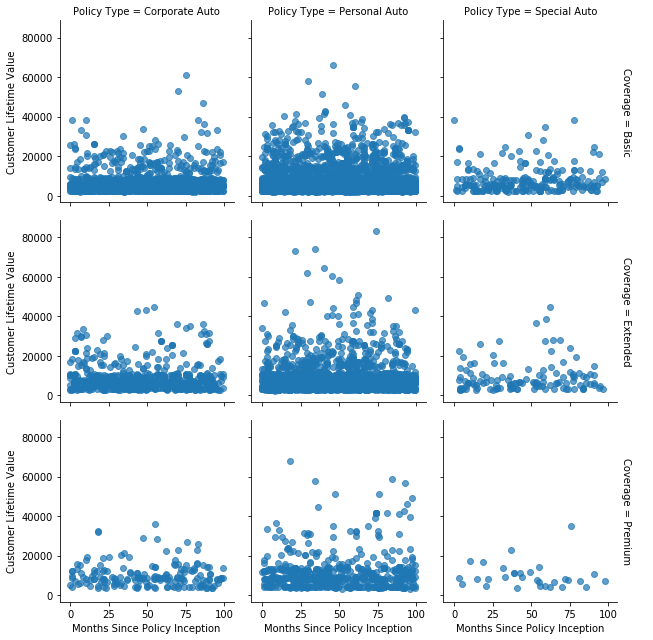

In [12]:
# CLV v/s Months Since Policy Inception wrt Policy type and Coverage
g = sns.FacetGrid(ins, col="Policy Type", row = "Coverage", margin_titles=True)
g.map(plt.scatter, "Months Since Policy Inception", "Customer Lifetime Value", alpha=.7)
g.add_legend();

Text(0, 0.5, 'CLV')

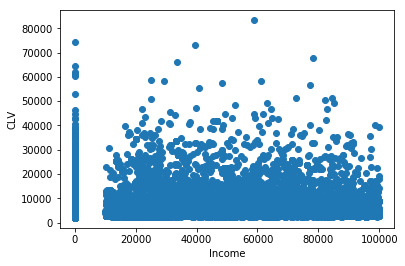

In [13]:
y = ins["Customer Lifetime Value"]
x = ins["Income"]

# plot the data
plt.scatter(x,y)
plt.xlabel("Income")
plt.ylabel("CLV")

In [14]:
ins["State"].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

KeyboardInterrupt: 

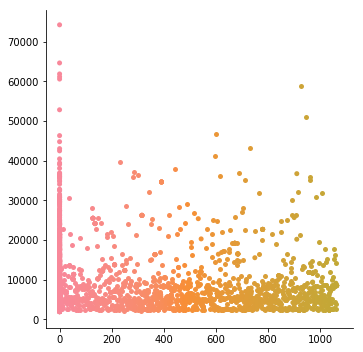

In [15]:
sns.catplot(x="Income", y="Customer Lifetime Value", data=ins);
#loaded

In [ ]:
ins.groupby("State").count()

In [ ]:
# HISTOGRAM of CLV values for various states
dflist = {}
for state in list(ins["State"].unique()):
    dflist[state] = ins[ins["State"] == state]

for state,df1 in dflist.items():
    plt.figure()
    plt.hist(df1["Customer Lifetime Value"], bins = 200)
    plt.ylim((0, 300))
    plt.ylabel(state+str("_CLV"))
    plt.xlabel("Frequency")